### Perform sentimental analysis:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [4]:
!pip install spacy
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

     ---------------------------------------- 12.1/12.1 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 50.1/50.1 kB 866.7 kB/s eta 0:00:00
     -------------------------------------- 481.9/481.9 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 395.2/395.2 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 45.0/45.0 kB 740.0 kB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_ext

In [6]:
#Multi-page web-scraping
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [7]:
#Looping through multiple pages

In [8]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [9]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [19]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [39]:
df = pd.DataFrame(reviewlist)
df.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,Reviewed in India on 2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",Reviewed in India on 5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,Reviewed in India on 6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022


In [21]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [22]:
df.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


In [23]:
df.to_csv("BoatSmartWatch_Review.csv")

In [25]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


In [26]:
reviews.Rating.describe()

count    30.000000
mean      4.300000
std       0.794377
min       3.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        30 non-null     object 
 1   Rating       30 non-null     float64
 2   Review       30 non-null     object 
 3   Review_Date  30 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [28]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [29]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


In [30]:
#Date vs Review Count

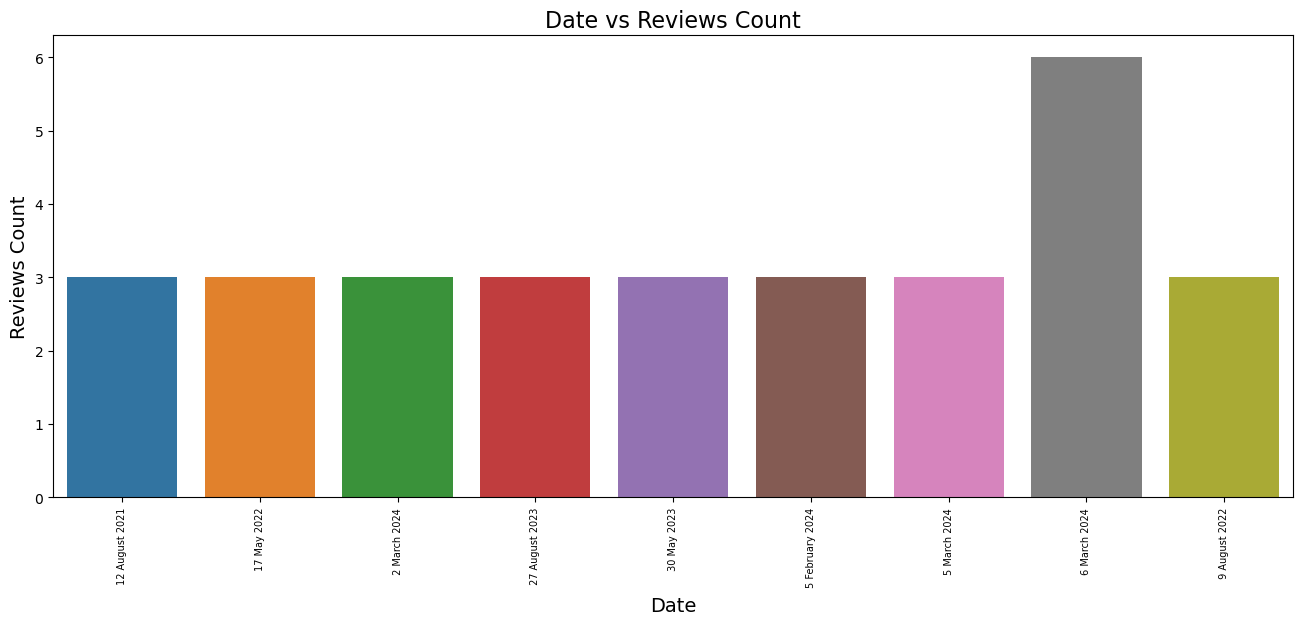

In [31]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

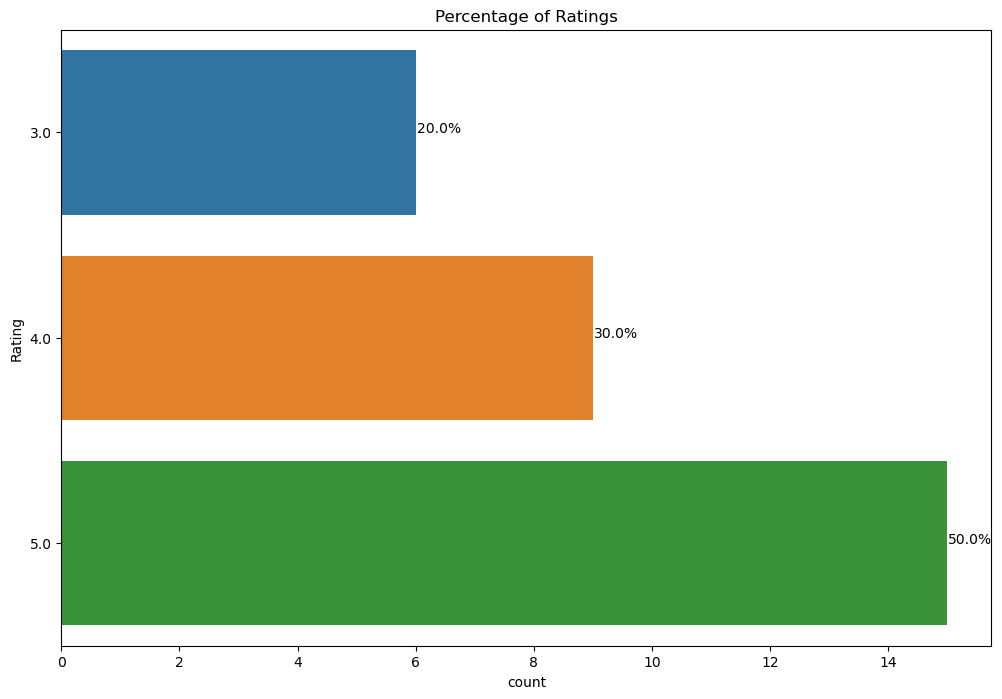

In [32]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [34]:
#BasicText Preprocessing for Sentiment Analysis

In [35]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I am using smart watch for the first time. Mod...
1    His smart (model Coat extend plus) watch is sa...
2    Very good ,nice and worth for money, super pro...
3    Looks so good... Easy to use. Charging fast. C...
4    Shipping the parts mostly covered in other rev...
Name: Review, dtype: object

In [36]:
boat_review = reviews[['Review']]
boat_review

,Review
0,I am using smart watch for the first time. Mod...
1,This smart (model Boat extend plus) watch is f...
2,"Very good ,nice and worth for money, super pro..."
3,Looks so good... Easy to use. Charging fast. C...
4,Skipping the parts mostly covered in other rev...
5,My experience with the boAt Xtend Call Plus Sm...
6,Good product and also very good packaging very...
7,Face pic not allowed in face watch and working...
8,Review OverviewAverage2.7The Boat today launch...
9,The media could not be loaded.\n ...


In [40]:
boat_review.reset_index(drop=True, inplace=True)

In [41]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

In [42]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/30 [00:00<?, ?it/s]

In [43]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


In [44]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [45]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....


In [46]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....


In [47]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....


In [48]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....


In [49]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [50]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....


In [52]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [53]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [54]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....


In [55]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [56]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [using, smart, watch, first, time, model, xten...
1    [smart, model, boat, extend, plus, watch, func...
2           [good, nice, worth, money, super, product]
3    [look, good, easy, use, charging, fast, charge...
4    [skipping, part, mostly, covered, review, spon...
5    [experience, boat, xtend, call, plus, smart, w...
6    [good, product, also, good, packaging, impress...
7    [face, pic, allowed, face, watch, working, bes...
8    [review, overviewaverage, boat, today, launche...
9    [medium, could, loaded, used, watch, month, bo...
Name: Clean_Reviews, dtype: object

In [57]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
6,good product also good packaging impressive,good product also good packaging impressive,"[good, product, also, good, packaging, impress..."
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...,"[face, pic, allowed, face, watch, working, bes..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."


In [58]:
stemmer = SnowballStemmer("english")

In [61]:
#Converting words to Stemmer
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,use smart watch first time model xtend boat rt...
1,smart model boat extend plus watch function we...
2,good nice worth money super product
3,look good easi use charg fast charg stay long ...
4,skip part most cover review sponsor yt one add...
5,experi boat xtend call plus smart watch somewh...
6,good product also good packag impress
7,face pic allow face watch work best activ work
8,review overviewaverag boat today launch boat x...
9,medium could load use watch month bought first...


In [62]:
#Converting words to Lemma

In [63]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,using smart watch first time model xtend boat ...
1,smart model boat extend plus watch functioning...
2,good nice worth money super product
3,look good easy use charging fast charge stay l...
4,skipping part mostly covered review sponsored ...
5,experience boat xtend call plus smart watch so...
6,good product also good packaging impressive
7,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...
9,medium could loaded used watch month bought fi...


In [65]:
#Applying bag of Words without N grams

In [66]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [68]:
print(cv.get_feature_names_out()[109:200])

['buildi' 'built' 'burnt' 'button' 'buy' 'buying' 'cable' 'cache'
 'calculated' 'calculator' 'calender' 'call' 'called' 'caller' 'calling'
 'calorie' 'calory' 'cals' 'camera' 'cannot' 'carddesign' 'care' 'cart'
 'case' 'category' 'catering' 'charge' 'charger' 'charging' 'charm'
 'cheap' 'check' 'checked' 'checking' 'chinese' 'claim' 'claimed' 'clean'
 'clear' 'clearing' 'clearly' 'clipuser' 'clone' 'cloud' 'color' 'colour'
 'colourcharging' 'come' 'comfortable' 'comfortdisplaywatch' 'comfortwhen'
 'coming' 'common' 'company' 'compared' 'complain' 'complaining'
 'completely' 'concern' 'conclusion' 'condition' 'configuration'
 'configure' 'connect' 'connected' 'connecting' 'connectivity'
 'considerably' 'considering' 'consmusic' 'construction' 'contact'
 'content' 'contentboat' 'contentdesign' 'contentsbox' 'contentsmartwatch'
 'continuously' 'control' 'controlling' 'convenient' 'conversation' 'cool'
 'correct' 'cost' 'could' 'count' 'counting' 'course' 'cove' 'covered']


In [69]:
print(cv.get_feature_names_out()[:100])

['ac' 'accept' 'access' 'accessibility' 'accidentally' 'account'
 'accuracy' 'accuracybatteryyou' 'accuracycomparing' 'accurate'
 'accurately' 'activate' 'activating' 'active' 'activites' 'activity'
 'actual' 'actually' 'adapter' 'add' 'added' 'addition' 'adjust'
 'advanced' 'aggregate' 'alarm' 'alexa' 'allowed' 'allowing' 'also'
 'alternative' 'aluminium' 'always' 'amazfit' 'amazon' 'amoled' 'amount'
 'analog' 'android' 'angle' 'animal' 'animation' 'another' 'answer'
 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'apple' 'apps' 'appyou' 'around'
 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm' 'attention' 'audio'
 'auto' 'available' 'average' 'away' 'back' 'background' 'backup' 'band'
 'bank' 'bar' 'based' 'basic' 'bathing' 'battery' 'beautiful' 'beginning'
 'believe' 'beneficial' 'best' 'better' 'beyond' 'bezel' 'big' 'bike'
 'bip' 'bit' 'black' 'blood' 'bluetooth' 'boat' 'body' 'bother' 'bought'
 'box' 'bp' 'break' 'breath']


In [81]:
print(tweetscv.toarray()[:200])

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [71]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

In [82]:
dataframe = dataframe.reset_index(drop=True)

In [83]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/30 [00:00<?, ?it/s]

In [84]:
corpus[3]

'look good easi use charg fast charg stay long time'

In [85]:
#Applying Countvectorizer (Creating the Bag of Words model)

In [111]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [112]:
X.shape

(30, 1546)

In [113]:
cv.get_feature_names_out()[:20]

array(['ac', 'access', 'accur', 'accuraci', 'activ', 'activ step',
       'actual', 'ad', 'add', 'alarm', 'alexa', 'alexa support',
       'alexa watch', 'alexa work', 'allow', 'also', 'also good', 'alway',
       'amazon', 'amazon alexa'], dtype=object)

In [114]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [115]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,ac,access,accur,accuraci,activ,activ step,actual,ad,add,alarm,...,would recommend,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,6,1,1,0,3,0,...,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,1,0,...,0,0,0,2,0,2,2,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,4,3,1,0,0,1,0,1,...,2,2,0,20,1,0,0,7,1,1
9,1,0,3,1,3,0,1,2,0,2,...,0,0,0,1,0,0,0,0,1,1


In [116]:
#TF-IDF Vectorizer

In [117]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/30 [00:00<?, ?it/s]

In [118]:
corpus[4]

'skip part mostli cover review sponsor yt one add irrit common sens disappoint notic sinc last day actual usag smart watch aod show date day week show hour min way configur beyond analog digit view also get turn start exercis activ like walk screen go dark go walk calori count home screen anywher els show step count calori aggreg calori burnt exercis activ e step cal cycl show home screen separ two entri app smart enough addit quick way go start activ exercis first press side button twice select activit list menu versu swipe home screen go utterli useless cricket score screen instead mani even use customis menu option function map provid touch wake display avail screen avail rupe yr old huwai band one press side button everi time see home screen utterli inconveni reach day night time auto configur aod twist wake provid make irrit sleep hour kept thu daili two time day task enabl disabl featur manual everi freak day kindli also note indic whatsoev aod start exercis activ start one like 

In [119]:
#Applying TF-IDF Vectorizer

In [120]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [121]:
X.shape

(30, 1546)

In [122]:
tfidf_v.get_feature_names_out()[:20]

array(['ac', 'access', 'accur', 'accuraci', 'activ', 'activ step',
       'actual', 'ad', 'add', 'alarm', 'alexa', 'alexa support',
       'alexa watch', 'alexa work', 'allow', 'also', 'also good', 'alway',
       'amazon', 'amazon alexa'], dtype=object)

In [123]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [125]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,ac,access,accur,accuraci,activ,activ step,actual,ad,add,alarm,...,would recommend,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.090297,0.120204,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.029129,0.000000,0.000000,0.023215,0.038777,0.000000,0.000000,0.000000,0.033218,...,0.000000,0.000000,0.038777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066436
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.019819,0.000000,0.022601,0.094771,0.026384,0.026384,0.000000,0.079151,0.000000,...,0.000000,0.000000,0.026384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.035212,0.000000,0.000000,0.028063,0.000000,0.000000,0.000000,0.046874,0.000000,...,0.000000,0.000000,0.000000,0.070424,0.000000,0.114835,0.114835,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.176910,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.011261,0.059962,0.038525,0.008974,0.000000,0.000000,0.014990,0.000000,0.012842,...,0.036724,0.036724,0.000000,0.225216,0.014990,0.000000,0.000000,0.128535,0.014990,0.012842
9,0.030511,0.000000,0.074726,0.021338,0.044736,0.000000,0.024909,0.049817,0.000000,0.042676,...,0.000000,0.000000,0.000000,0.018711,0.000000,0.000000,0.000000,0.000000,0.024909,0.021338


In [126]:
#Named Entity Recognition (NER)

In [127]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'using smart watch first time model xtend boat rtl give smart look easy use day battery backup comfortable fully satisfied highly recommend buy one thing hurt bought watch r amazon today price reduced r wish amazon concern retailer refund r bought watch single cart smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain ti

In [149]:
#Parts Of Speech (POS) Tagging
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 3.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [152]:
nlp = spacy.load('en_core_web_sm')
one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [153]:
for token in doc_block[:50]:
    print(token,token.pos_)

using VERB
smart ADJ
watch NOUN
first ADJ
time NOUN
model NOUN
xtend PROPN
boat PROPN
rtl NOUN
give VERB
smart ADJ
look NOUN
easy ADJ
use NOUN
day NOUN
battery NOUN
backup NOUN
comfortable ADJ
fully ADV
satisfied ADJ
highly ADV
recommend NOUN
buy VERB
one NUM
thing NOUN
hurt NOUN
bought VERB
watch VERB
r NOUN
amazon NOUN
today NOUN
price NOUN
reduced VERB
r NOUN
wish NOUN
amazon PROPN
concern NOUN
retailer NOUN
refund PROPN
r NOUN
bought VERB
watch VERB
single ADJ
cart ADJ
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB


In [154]:
#Filtering the nouns and verbs only

In [155]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['rain', 'time', 'display', 'number', 'display', 'cloud', 'feature', 'working', 'model', 'feature', 'skin', 'made', 'display', 'wrist', 'put', 'rest', 'raise', 'feature', 'feature', 'enabled', 'calling', 'feature', 'speaker', 'call', 'listening', 'video', 'walking', 'battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'money', 'product', 'look', 'use', 'charging', 'charge', 'stay', 'time', 'skipping', 'par

In [156]:
#Counting the noun & verb tokens

In [157]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,183
1,boat,114
2,smartwatch,75
3,time,69
4,feature,69
5,day,66
6,xtend,66
7,display,57
8,app,45
9,screen,42


In [158]:
#Visualizing results (Barchart for top 10 nouns + verbs)

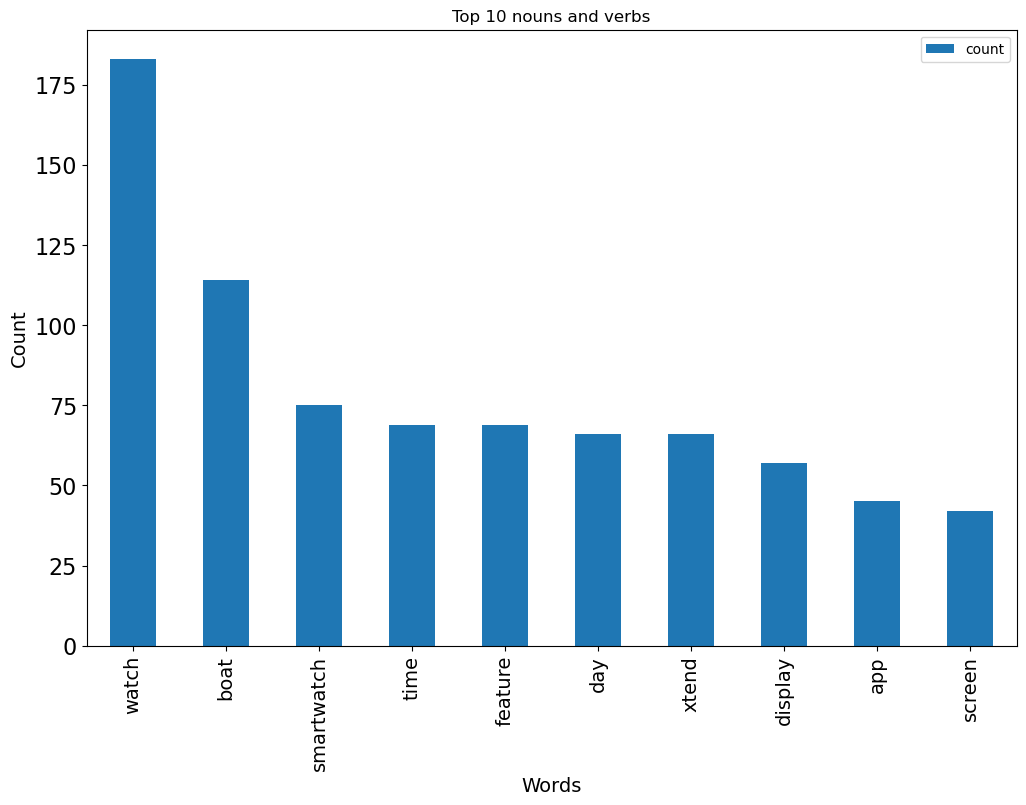

In [159]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [160]:
#Feature Extraction

In [161]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [162]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [163]:
#Fetch sentiments Using TextBlob

In [167]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [168]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,27
neg,3


In [169]:
#Let's calculate subjectivity and Polarity

In [170]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten...",0.625833,0.262560
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]",0.591667,0.483333
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266


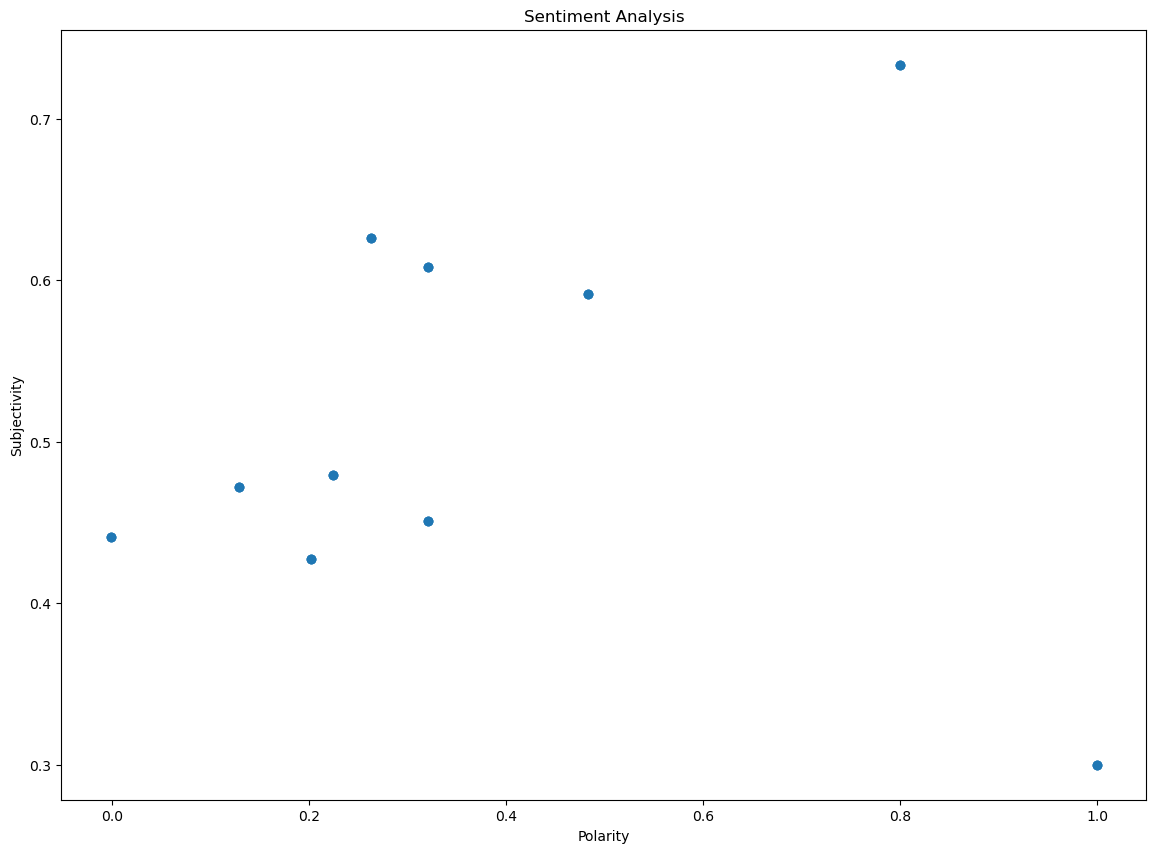

In [171]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [172]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten...",0.625833,0.262560,pos
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]",0.591667,0.483333,pos
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833,pos
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg


In [173]:
#Story Generation and Visualization

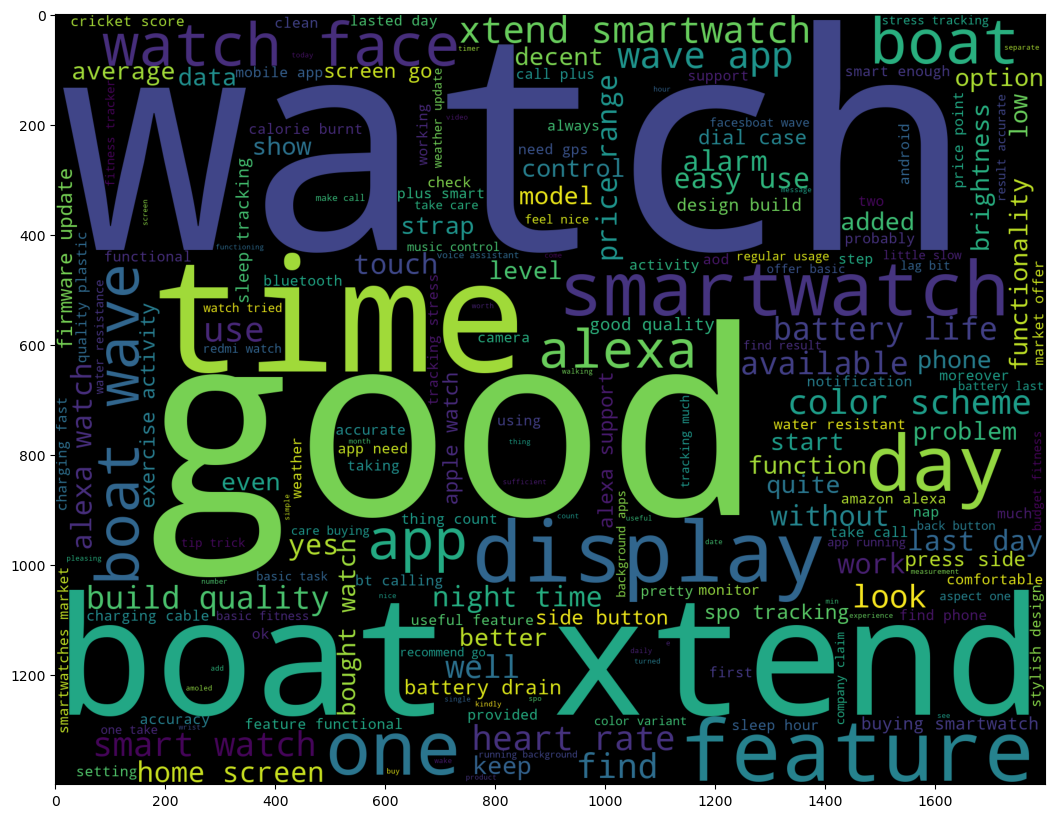

In [174]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [175]:
#Most common words in positive Review

In [179]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

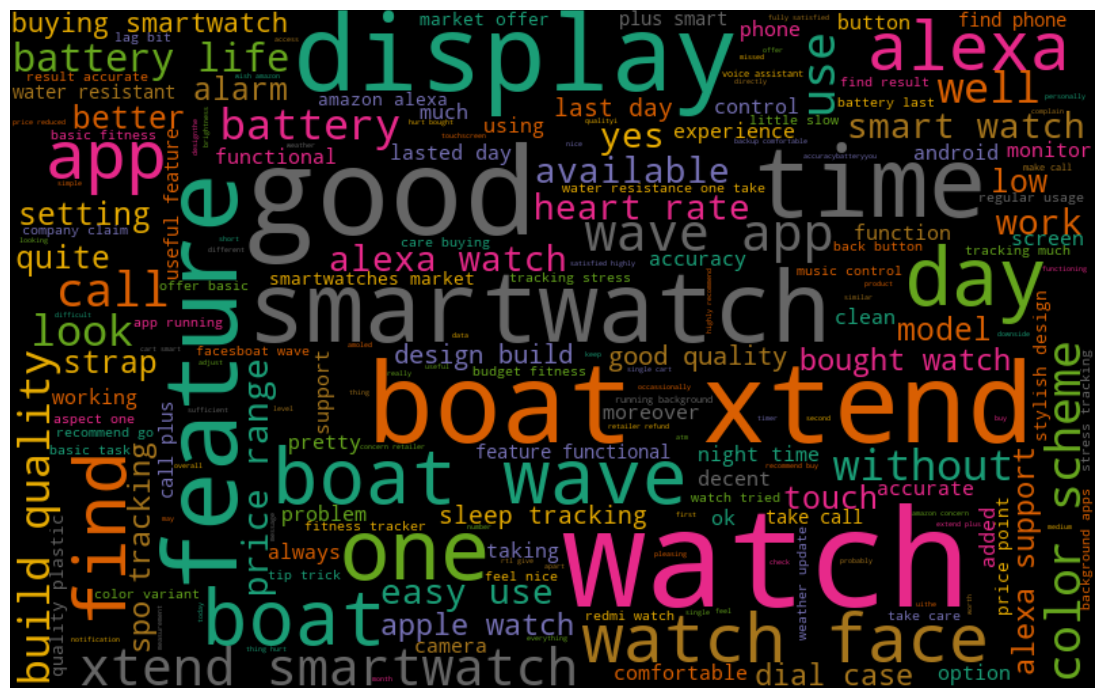

In [177]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

In [180]:
#Most common words in negative Review

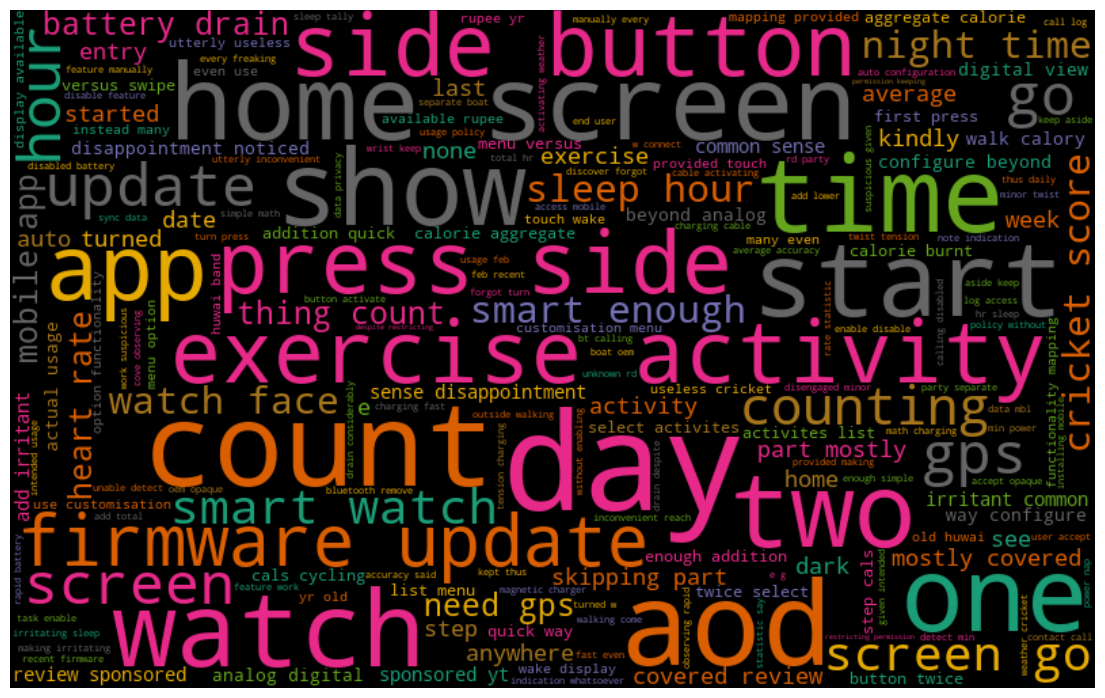

In [182]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)